### Importing libraries  

In [183]:
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob as glob
import scipy.misc

### reading the image and converting it to gray 

In [184]:
example_grid = "../calibration_images/example_grid1.jpg"

grid_img = cv2.imread(example_grid)


gray = cv2.cvtColor(grid_img,cv2.COLOR_BGR2GRAY)

### Applying GaussianBlur of kernal size (3,3) to the image and then use canny detection to detect the edges 

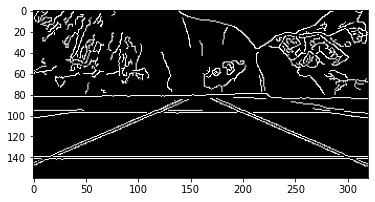

In [185]:
blurred = cv2.GaussianBlur(gray, (3,3), 0)

edges = cv2.Canny(blurred, 70,30)
     
plt.imshow(edges,cmap='gray')

### prepration of the polygon mask we will use later to remove any objects except the grid 

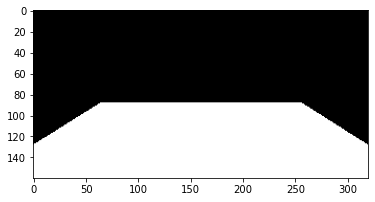

In [186]:
height, width = edges.shape
mask = np.zeros_like(edges)
polygon = np.array([[


(0,height),

(0,int(height*0.8)),                         
# Bottom-left point
(int(width*0.2),  int(height*0.55)),    # Top-left point
(int(width*0.8), int(height*0.55)),    # Top-right point
(width,     int(height*0.8)),
(width, height),                        # Bottom-right point
]], np.int32)
cv2.fillPoly(mask, polygon, 255)

plt.imshow(mask,cmap='gray')

### the result after the mask  

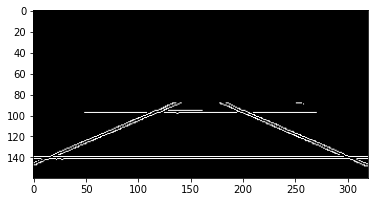

In [187]:
edges = cv2.bitwise_and(mask, edges)
plt.imshow(edges,cmap='gray')

### applying hough line transform then reshaping the np array to use in the supress function later

In [188]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 10, minLineLength=100, maxLineGap=60)

print(lines.shape)

linesReshaped = lines.reshape((lines.shape[0], lines.shape[2])) 

print(linesReshaped.shape) 

(10, 1, 4)
(10, 4)


###  Drawing the unsupressed lines on the original image

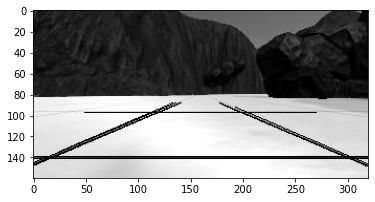

In [189]:
grayUnsub = np.array(gray) # make a copy of the orignal image 

for x1,y1,x2,y2 in linesReshaped:  
    cv2.line(grayUnsub, (x1, y1), (x2, y2), 0, 1)

plt.imshow(grayUnsub,cmap='gray')

### Defining suppress function that takes a window (number) and arr (2d array) and returns the supressed version of the numpy array

In [190]:
def supress(arr, window):   
    m = arr.shape[1]
    supressedarr = np.ndarray(shape =(0, m), dtype = arr.dtype)
    

    for element in arr:
        u = True
        for suppressed in supressedarr:
            c = 0      
            for k in range (m):
                if ( abs (element[k] - suppressed[k])  < window) :
                    c+=1 
            e=0
            for k in range (m):
                if ( abs (element[k] - suppressed[k])  == 0) :
                    e+=1
            if (c==m and e!=m):
                    u = False
                    for i in range (m):
                        suppressed[i] =( suppressed[i] + element[i] )/2

        if (u):
            supressedarr = np.append(np.array(  [element]  ), supressedarr, axis=0)


    return supressedarr

### Supressing the lines using supress function I wrote  

In [191]:
print(linesReshaped.shape)

subressedlines = supress(linesReshaped,40)

print(subressedlines.shape)


(10, 4)
(4, 4)


###   Outputting the subressedlines on the orignal image for the sake of demonstration

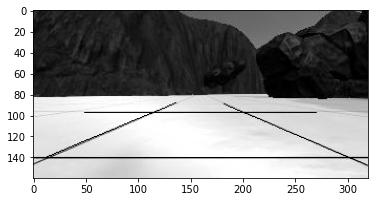

In [192]:
for x1,y1,x2,y2 in subressedlines:  
    cv2.line(gray, (x1, y1), (x2, y2), 0, 1)

plt.imshow(gray,cmap='gray')

### Making 4 empty images of zeros and drawing each line in one image

In [193]:
imagesArr = []

for i in range (4):

    imgOfOneLine = np.zeros_like(edges, dtype=None, shape=None)

    x1, y1, x2, y2 = subressedlines[i]

    cv2.line(imgOfOneLine, (x1, y1), (x2, y2), 50, 1)

    imagesArr.append(imgOfOneLine)

### Make an empty array to store the points of intersections (corners) and adding the 4 images we did earlier and store the result in the first elemnt of the array 

In [194]:
points = np.ndarray(shape=(0,2),dtype=np.int32)

for k in range (1,4):
    imagesArr[0] += imagesArr[k]

### Loop all over the image and append the (i,j) of the pixels that its values exceeds 80 (the corners)

In [195]:

for j in range (imagesArr[0].shape[0]):
    for i in range (imagesArr[0].shape[1]):
        if (imagesArr[0][j][i]>80):
            points = np.append(points, np.array(  [[i,j]]  ), axis=0)


### Thresholding all the pixesl thats its values lower than or equal 50 (the not corners) and plot the image

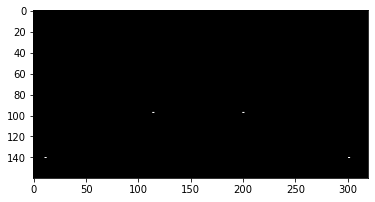

In [196]:
imagesArr[0][imagesArr[0] <=50] = 0

plt.imshow(imagesArr[0],cmap='gray')

### Now we print the points

In [197]:
subressedpoints = supress(points, 10)
print(subressedpoints)

[[301 140]
 [ 11 140]
 [200  97]
 [114  97]]


# The down cells are for testing....

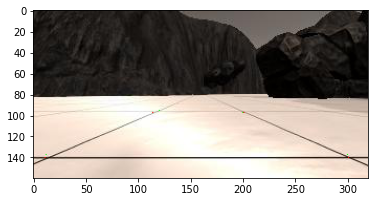

In [167]:
example_grid = "../calibration_images/example_grid1.jpg"

grid_img = cv2.imread(example_grid)

grid_img = cv2.cvtColor(grid_img, cv2.COLOR_BGR2RGB)


grid_img[140,11] = (255,0,0)
grid_img[137,12] = (0,255,0)

grid_img[140,301] = (255,0,0)
grid_img[137,300] = (0,255,0)


grid_img[97,201] = (255,0,0)
grid_img[97,200] = (0,255,0)

grid_img[97,114] = (255,0,0)
grid_img[95,120] = (0,255,0)


plt.imshow(grid_img)

In [ ]:
def nothing(x):
    pass

example_grid = "../calibration_images/example_grid1.jpg"

grid_img = cv2.imread(example_grid)


gray = cv2.cvtColor(grid_img,cv2.COLOR_BGR2GRAY)





cv2.namedWindow('image')


cv2.createTrackbar('t1', 'image', 1, 200, nothing)
cv2.createTrackbar('t2', 'image', 1, 200, nothing)
cv2.createTrackbar('b', 'image', 1, 4, nothing)

while(True):
    # show image
    

    k = cv2.waitKey(1) & 0xFF
    if k == 'q':
        break

    t1 = cv2.getTrackbarPos('t1', 'image')
    t2 = cv2.getTrackbarPos('t2', 'image')
    b = cv2.getTrackbarPos('b', 'image')

    blurred = cv2.GaussianBlur(gray, (2*b+1,b*2+1), 0)
    edges = cv2.Canny(blurred, t1, t2)

    for j in range (edges.shape[0]):
        for i in range (edges.shape[1]):
            if j <90:
                edges[j,i]=0

    
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 10, minLineLength=100, maxLineGap=50)

    lines = lines.reshape(  (lines.shape[0], lines.shape[2])   ) 
    img = np.zeros_like(edges, dtype=None, shape=None)

    lines = sub(lines,15)

    lines = sub(lines,25)
    for x1,y1,x2,y2 in lines:  
        cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 1)


        

    cv2.imshow('image', img)
#####            


# close the window
cv2.destroyAllWindows()